# EDA for historical transaction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime       #时间特征相关计算
import gc             #del某个变量后 通过gc.collect()收集垃圾释放系统内存

# Loading Data

In [2]:
%%time
df_hist_trans = pd.read_csv('historical_transactions.csv',parse_dates=['purchase_date'])

Wall time: 2min 3s


In [3]:
%%time
df_train = pd.read_csv('train.csv',parse_dates=['first_active_month'])

Wall time: 556 ms


# Basic Check

In [4]:
df_train.isna().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [5]:
df_train.nunique()

first_active_month        75
card_id               201917
feature_1                  5
feature_2                  3
feature_3                  2
target                197110
dtype: int64

---

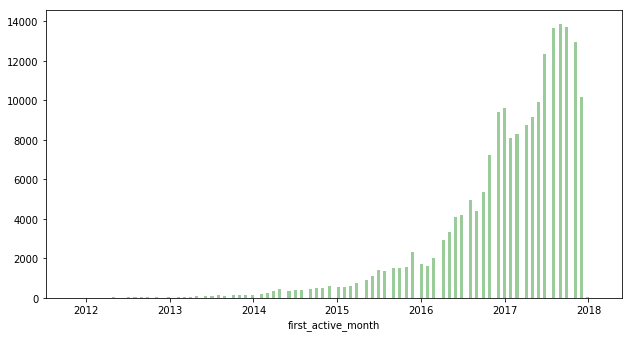

In [6]:
# first_active_month distribution
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,1,1))
sns.distplot(df_train['first_active_month'], bins =170,kde=False,color='green')

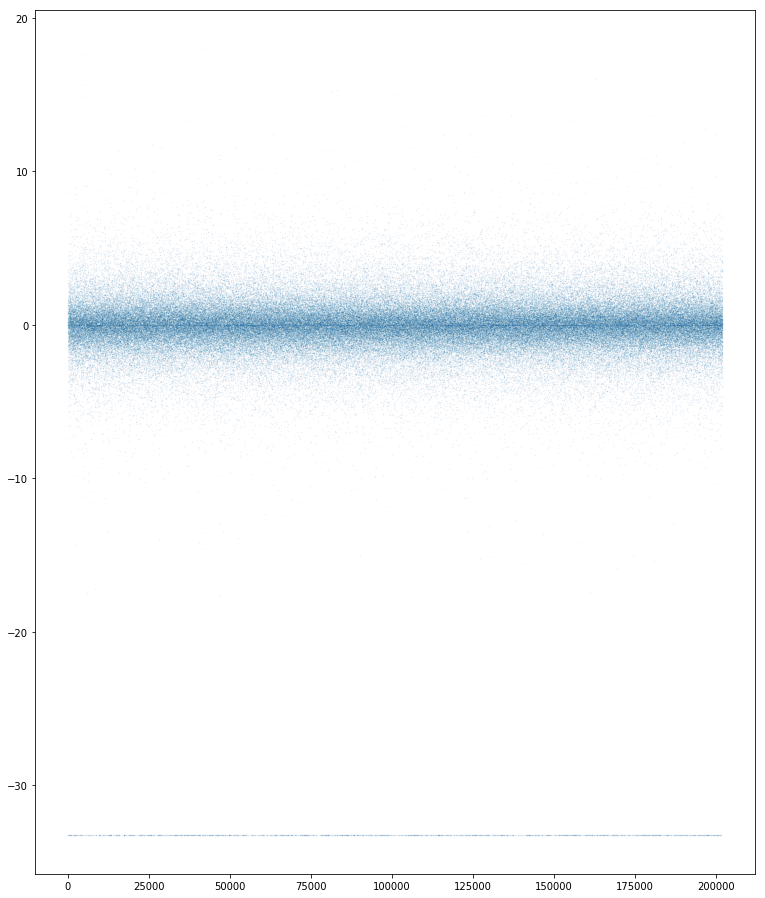

In [7]:
# 按index 画 target无规律
#target 顺序已经被打乱
fig = plt.figure(figsize=(10,12))
ax = fig.add_axes([0,0,1,1])
plt.scatter(x=range(len(df_train)),y=df_train.target,s=0.03,alpha=0.2)

---

# 把 target merge 到 transaction 上

In [4]:
df_merge_hist = pd.merge(df_hist_trans,df_train,how='left',on='card_id')

In [9]:
df_merge_hist.dropna(subset=['target'],axis=0,inplace=True) #去掉transaction中 test_set部分 

MemoryError: 

In [ ]:
df_merge_hist.head()

In [ ]:
df_merge_hist.isna().sum()/df_merge_hist.shape[0]

In [ ]:
df_hist_trans.isna().sum()/df_hist_trans.shape[0]

In [ ]:
df_merge_hist['month_diff1'] = ((datetime.datetime.today() - df_merge_hist['purchase_date']).dt.days)//30
df_merge_hist['month_diff1'] += df_merge_hist['month_lag']

In [ ]:
df_merge_hist['outliers'] = df_merge_hist['target']<=-30

In [ ]:
df_merge_hist.head(30)

In [ ]:
df_merge_hist.category_3.value_counts(dropna=False)

In [ ]:
df_merge_hist.category_2.value_counts(dropna=False)

In [ ]:
df_merge_hist.category_1.value_counts(dropna=False)

In [ ]:
df_merge_hist.installments.value_counts(dropna=False)

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,1,1))
sns.distplot(df_merge_hist['purchase_date'], bins =250,kde=False,color='green')

In [ ]:
from scipy import stats

In [ ]:
df_month_diff1 = df_merge_hist[['target','month_diff1','card_id','outliers']].groupby('card_id').agg({'outliers':'mean','month_diff1':(lambda x: stats.mode(x)[0][0]),'target':'mean'})

In [ ]:
df_month_diff1.reset_index(inplace=True)

In [ ]:
df_month_diff1.head()

In [80]:
plt_data = df_month_diff1.groupby('month_diff1').target.mean()

In [86]:
plt_data = plt_data.reset_index()

In [121]:
plt_data

,month_diff1,target
0,11,-0.039999
1,12,-0.511442
2,13,-1.780436
3,14,-1.947786
4,15,-1.813903
5,16,-1.216544
6,17,-1.145027
7,18,-1.568140
8,19,-1.348364
9,20,-0.842516


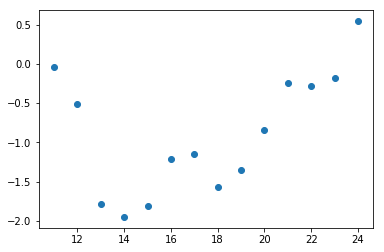

In [88]:
plt.scatter(x=plt_data.month_diff1,y=plt_data.target)

In [105]:
df_merge_hist.state_id.value_counts(dropna=False)/df_merge_hist.shape[0]

 9     0.363845
-1     0.090815
 16    0.073869
 15    0.071122
 5     0.056440
 19    0.041178
 20    0.038277
 22    0.032723
 21    0.032580
 4     0.029083
 11    0.022104
 13    0.021901
 7     0.021797
 3     0.018672
 18    0.013527
 12    0.013490
 2     0.012893
 1     0.008616
 10    0.007420
 24    0.007156
 23    0.006920
 14    0.006020
 8     0.005339
 17    0.003979
 6     0.000236
Name: state_id, dtype: float64

In [106]:
df_merge_hist.month_lag.value_counts(dropna=False)

-2     2389787
-1     2248468
 0     2151419
-3     1920958
-4     1635925
-5     1466671
-6     1271559
-7     1098685
-8      882416
-9      761224
-10     668862
-11     620200
-12     488207
-13     425628
Name: month_lag, dtype: int64

In [120]:
month_lag = df_merge_hist[['target','month_lag','card_id','outliers']].groupby('card_id').agg({'outliers':'mean','month_lag':(lambda x: stats.mode(x)[0][0]),'target':'mean'})

In [110]:
month_lag.reset_index(inplace=True)

In [112]:
month_lag.groupby('month_lag').target.mean()

month_lag
-13   -0.061821
-12   -0.162280
-11   -0.357102
-10   -0.435350
-9    -0.490584
-8    -0.503165
-7    -0.342935
-6    -0.483302
-5    -0.557463
-4    -0.384898
-3    -0.351393
-2    -0.252650
-1    -0.358940
 0    -0.586725
Name: target, dtype: float64

In [124]:
month_lag.month_lag.value_counts(dropna=False)

-2     36868
-1     29843
 0     27998
-3     22134
-4     16327
-5     14303
-6     12034
-7     10333
-8      6906
-9      5938
-11     5671
-10     5318
-13     4309
-12     3935
Name: month_lag, dtype: int64

In [122]:
plt_data_2 = month_lag.groupby('month_lag').target.mean()
plt_data_2 = plt_data_2.reset_index()

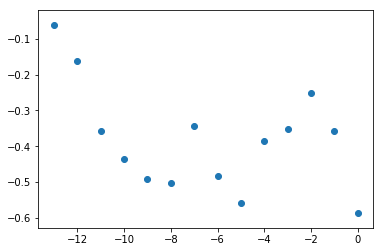

In [123]:
plt.scatter(x=plt_data_2.month_lag,y=plt_data_2.target)

In [125]:
purchase_date_ptp = df_merge_hist[['target','card_id','purchase_date','outliers']].groupby('card_id').agg({'outliers':'mean','purchase_date':np.ptp,'target':'mean'})

In [127]:
purchase_date_ptp.head()

,outliers,target,purchase_date
card_id,,,
C_ID_00007093c1,False,0.134077,377 days 15:14:14
C_ID_0001506ef0,False,0.884295,398 days 20:17:55
C_ID_000183fdda,False,-0.264433,202 days 11:07:54
C_ID_00027503e2,False,0.812872,237 days 01:46:11
C_ID_0002c7c2c1,False,1.288514,284 days 19:54:50


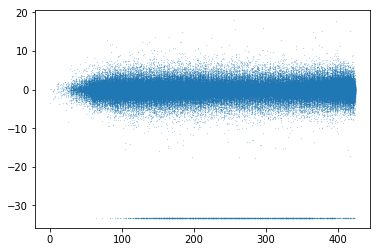

In [133]:
plt.scatter(x=purchase_date_ptp.purchase_date.dt.days,y=purchase_date_ptp.target,s=0.01)

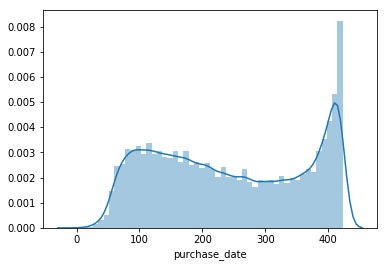

In [134]:
sns.distplot(purchase_date_ptp.purchase_date.dt.days)

In [152]:
purchase_date_ptp['days_ptp'] = purchase_date_ptp.purchase_date.dt.days

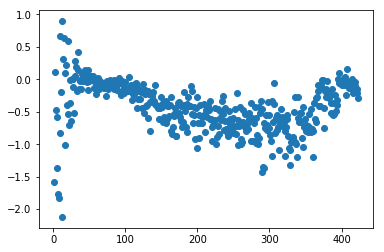

In [153]:
plt_data_3 = purchase_date_ptp.groupby('days_ptp').target.mean()
plt_data_3 = plt_data_3.reset_index()
plt.scatter(x=plt_data_3.days_ptp,y=plt_data_3.target)

In [154]:
purchase_date_ptp.days_ptp.value_counts()

421    2039
420    1939
419    1828
418    1730
417    1717
422    1544
416    1415
413    1323
415    1302
412    1290
414    1242
410    1124
411    1115
409    1108
406     971
407     933
405     908
408     905
396     904
395     871
399     794
400     791
398     788
403     784
402     754
393     752
404     752
88      751
91      740
401     728
       ... 
29       33
30       33
32       31
28       16
22       13
27       13
25       11
24       11
26       10
21        9
16        6
19        6
23        6
18        6
11        5
20        5
12        5
17        5
10        4
14        3
6         3
15        2
5         2
13        2
1         2
4         1
9         1
8         1
2         1
7         1
Name: days_ptp, Length: 422, dtype: int64

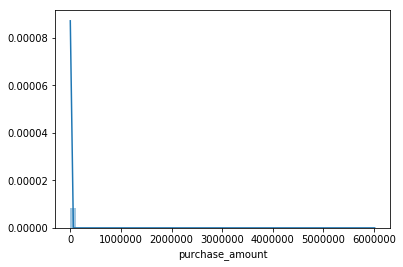

In [136]:
sns.distplot(df_merge_hist.purchase_amount)

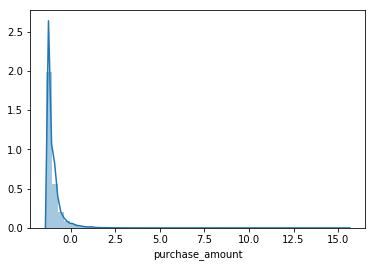

In [151]:
sns.distplot(np.log(1+df_merge_hist.purchase_amount))

In [142]:
df_merge_hist.purchase_amount.mean()

0.16155226785522617

In [143]:
df_merge_hist.purchase_amount.std()

1423.2244622722317

In [149]:
np.log(1+df_merge_hist.purchase_amount).mean()

-1.019570854237167

In [150]:
np.log(1+df_merge_hist.purchase_amount).std()

0.43197522162941254

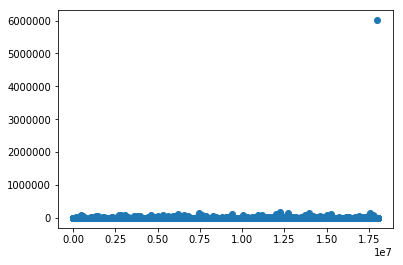

In [138]:
plt.scatter(x = range(len(df_merge_hist)),y = df_merge_hist.purchase_amount)

In [ ]:
sns.distplot(purchase_date_ptp.purchase_date.dt.days,bins=15)